In [2]:
import matplotlib.pyplot as plt
import json
import numpy as np


In [28]:

abies_alba_img = "raw_dataset/Abies alba_0504.geojson"

processed_img = np.load("assets\data_preprocessed_30bands.npz", allow_pickle=True)['image']
processed_label = np.load("assets\data_preprocessed_30bands.npz", allow_pickle=True)['labels']
print(processed_img[2])

with open(abies_alba_img, 'r') as file:
    data_dict = json.load(file)
    print(len(abies_alba_img))

    blue = data_dict['features'][0]['properties']['B2']
    red = data_dict['features'][0]['properties']['B4']
    green = data_dict['features'][0]['properties']['B3']
    swir = data_dict['features'][0]['properties']['B8']

blue_processed = processed_img[0][6]
red_processed = processed_img[0][12]
green_processed = processed_img[0][9]
label_processed = processed_label[0]

ndvi_layer = (np.array(swir) - np.array(red)) / (np.array(swir) + np.array(red))


print(label_processed)

[[[0.15605    0.16125    0.16125    0.17129999 0.17129999]
  [0.1512     0.1542     0.1542     0.16485    0.16485   ]
  [0.1512     0.1542     0.1542     0.16485    0.16485   ]
  [0.15725    0.15620001 0.15620001 0.1693     0.1693    ]
  [0.15725    0.15620001 0.15620001 0.1693     0.1693    ]]

 [[0.1723     0.17470001 0.17470001 0.1824     0.1824    ]
  [0.17479999 0.1743     0.1743     0.189      0.189     ]
  [0.17479999 0.1743     0.1743     0.189      0.189     ]
  [0.18279999 0.17990001 0.17990001 0.1937     0.1937    ]
  [0.18279999 0.17990001 0.17990001 0.1937     0.1937    ]]

 [[0.14264999 0.14345001 0.14345001 0.14685    0.14685   ]
  [0.13940001 0.13860001 0.13860001 0.1451     0.1451    ]
  [0.13940001 0.13860001 0.13860001 0.1451     0.1451    ]
  [0.14385    0.14174999 0.14174999 0.14565    0.14565   ]
  [0.14385    0.14174999 0.14174999 0.14565    0.14565   ]]

 [[0.12639999 0.12995    0.12995    0.1346     0.1346    ]
  [0.1247     0.12630001 0.12630001 0.13060001 0.1

In [29]:
blue = np.array(blue)
red = np.array(red)
print(red.shape)
green = np.array(green)

R = (red - np.min(red)) / (np.max(red) - np.min(red))

G = (green - np.min(green)) / (np.max(green) - np.min(green))

B = (blue - np.min(blue)) / (np.max(blue) - np.min(blue))

red_processed = (red_processed - np.min(red_processed)) / (np.max(red_processed) - np.min(red_processed))

green_processed = (green_processed - np.min(green_processed)) / (np.max(green_processed) - np.min(green_processed))

blue_processed = (green_processed - np.min(green_processed)) / (np.max(green_processed) - np.min(green_processed))

(5, 5)


[[[0.25906713 0.19948178 0.17098427 0.         0.09326429]
  [0.16321251 0.37046605 0.38341964 0.13989643 0.21243498]
  [0.23575105 0.36010357 0.64248715 0.58808247 0.4455957 ]
  [0.45854929 0.41968891 0.7176168  0.74870464 0.53885999]
  [0.3782382  0.45595857 1.         0.73057    0.29533679]]

 [[0.37234058 0.48581562 0.04609904 0.02836876 0.        ]
  [0.08865244 0.74113499 0.34751745 0.22340392 0.0992904 ]
  [0.13120532 0.5531911  0.87943264 0.69148979 0.4539007 ]
  [0.35106361 0.39007085 0.98226972 1.         0.64184354]
  [0.52482286 0.57446806 0.88297932 0.80141815 0.28723377]]

 [[0.58695598 0.4565214  0.29347758 0.         0.07608663]
  [0.32065196 0.48369497 0.48369497 0.47282603 0.17934764]
  [0.30434733 0.39673859 0.71739136 0.55978241 0.67391236]
  [0.51630422 0.5815211  0.78804311 0.85869568 0.6032606 ]
  [0.61956523 0.59782573 1.         0.84239105 0.44565165]]]
[[[0.25906713 0.19948178 0.17098427 0.         0.09326429]
  [0.16321251 0.37046605 0.38341964 0.13989643 0.2

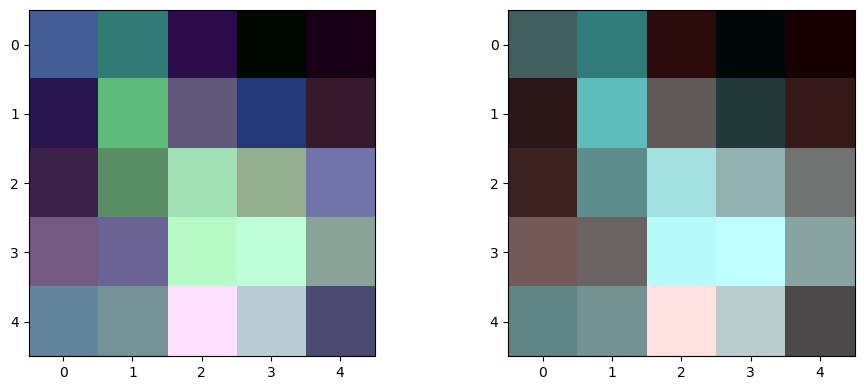

In [31]:
img = np.stack((R,G,B))
print(img)
mtx = np.stack((red_processed,green_processed,blue_processed))
print(mtx)

imageMatrix = []
for i in range(5):
    sub_list = []
    for j in range(len(R[i])):
        sub_list.append([R[i][j], G[i][j], B[i][j]])
    imageMatrix.append(sub_list)

imageMatrix = np.array(imageMatrix)

processedMatrix = []
for i in range(5):
    sub_list2 = []
    for j in range(len(red_processed[i])):
        sub_list2.append([red_processed[i][j], green_processed[i][j], blue_processed[i][j]])
    processedMatrix.append(sub_list2)

processedMatrix = np.array(processedMatrix)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

print(processedMatrix)


axs[0].imshow(imageMatrix)
axs[1].imshow(processedMatrix)


plt.tight_layout()

# Show the plots
plt.show()